#  Coursera - IBM Project
Python

Load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data.Using the following algorithms to build your models:

k-Nearest Neighbour

-Decision Tree

-Support Vector Machine

-Logistic Regression


Loading Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import itertools
from sklearn import preprocessing
%matplotlib inline


### About Dataset

Historical data for Loan applications. Has  customers whose loan are already paid off or defaulted.

| Fields| Description |
| --- | --- |
| Loan_status | Whether a loan is paid off on in collection |
| Principal | Basic principal loan amount at the |
| Terms |	Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date |	When the loan got originated and took effects |
| Due_date |	Since it’s one-time payoff schedule, each loan has one single due date |
| Age |	Age of applicant |
| Education |	Education of applicant |
| Gender |The gender of applicant |


## Loading Data

In [2]:
df = pd.read_csv('loan_train.csv')
df.head(10)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [3]:
df.shape

(346, 10)

## Converting to data time object

The datetime object is kind of a combination of date and time objects. It can store information from year to microseconds.

In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Visualization 

Using .value_counts() lets see clss in our data

In [5]:
df["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

form this data 260 people have paid off their loan on time and 86 have gone into collection


Using seaborn FacetGrid()- Multi-plot grid for plotting conditional relationships.This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.

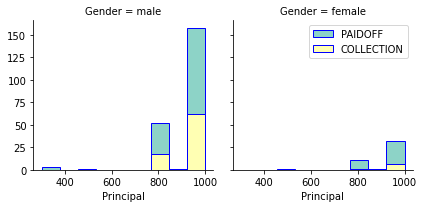

In [6]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
# col, hue-Variables that define subsets of the data, which will be drawn on separate facets in the grid.
# palette-Colors to use for the different levels of the hue variable.
# col_wrap-Wrap the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

g.map(plt.hist, 'Principal', bins=bins, ec="b")

g.axes[1].legend()
plt.show()

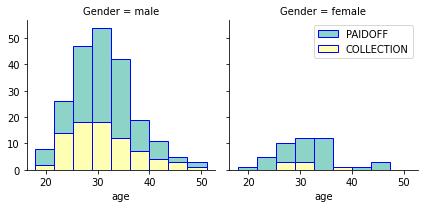

In [7]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="b")

g.axes[1].legend()
plt.show()

## Pre-processing: Feature selection/extraction¶


###  Look at the days and loan on each days

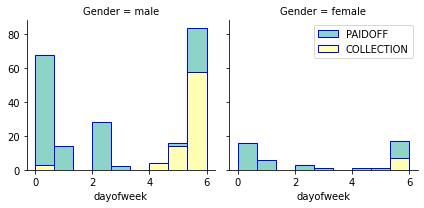

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="b")
g.axes[1].legend()
plt.show()

From the above graphs we conclude that at the end of the week has highest collection amount.so lets use Feature binarization to set a threshold values less then day 4.Feature binarization is the process of tresholding numerical features to get boolean values.

In [9]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### Convert Categorical features to numerical values
lets look at the genders


In [10]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

so 86% females pay their loans while 73% of males pay their loan
 convet male to 0 and female to 1:
 

In [11]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding 
-In this technique, the categorical parameters will prepare separate columns for both Male and Female labels. 


In [12]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before one hot Encoding

In [13]:
df[['Principal','terms','age','Gender','education']].head()


,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


####  Now,Using  one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [14]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Selecting Features

Lets define X features

In [15]:
X= Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


#### labels

In [16]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Normalize data
StandardScaler removes the mean and scales each feature/variable to unit variance.

In [17]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# K Nearest Neighbor


In [18]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


## Modeling


In [21]:
from sklearn.neighbors import KNeighborsClassifier


Lets take k = 5



In [22]:
k=5
#train model 
neigh = KNeighborsClassifier(n_neighbors =k).fit(X_train, y_train)
neigh   

KNeighborsClassifier()

Predicting

In [23]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [24]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8188405797101449
Test set Accuracy:  0.7428571428571429


In [25]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,pos_label="PAIDOFF")

0.71875

In [26]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

  COLLECTION       0.40      0.40      0.40        15
     PAIDOFF       0.84      0.84      0.84        55

    accuracy                           0.74        70
   macro avg       0.62      0.62      0.62        70
weighted avg       0.74      0.74      0.74        70



We can calculate the accuracy of KNN for different values of k

In [27]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65714286, 0.58571429, 0.74285714, 0.7       , 0.74285714,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

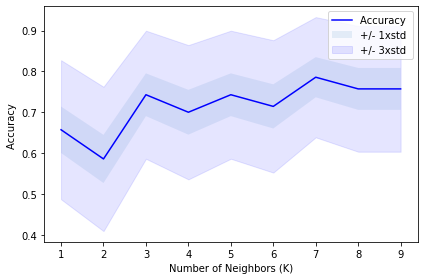

In [28]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")

plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [29]:
print('ACCURACY :')

metrics.accuracy_score(yhat,y_test)

ACCURACY :


0.7571428571428571

# Decesion Tree

In [30]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [31]:
my_data = pd.read_csv("loan_train.csv", delimiter=",")
my_data[0:5]


,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [32]:
X = my_data[['loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'age', 'education', 'Gender']].values
X[0:7]


array([['PAIDOFF', 1000, 30, '9/8/2016', '10/7/2016', 45,
        'High School or Below', 'male'],
       ['PAIDOFF', 1000, 30, '9/8/2016', '10/7/2016', 33, 'Bechalor',
        'female'],
       ['PAIDOFF', 1000, 15, '9/8/2016', '9/22/2016', 27, 'college',
        'male'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 28, 'college',
        'female'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 29, 'college',
        'male'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 36, 'college',
        'male'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 28, 'college',
        'male']], dtype=object)

In [33]:
from sklearn import preprocessing
le_loan_date = preprocessing.LabelEncoder()
# LabelEncoder()-Encode target labels with value between 0 and n_classes-1.
le_loan_date.fit(['COLLECTION', 'PAIDOFF'])
X[:,0]= le_loan_date.transform(X[:,0])

le_eff_date = preprocessing.LabelEncoder()
le_eff_date.fit(['9/8/2016', '9/9/2016', '9/10/2016', '9/11/2016', '9/12/2016', '9/13/2016', '9/14/2016'])
X[:,3] = le_eff_date.transform(X[:,3]) 

le_due_date = preprocessing.LabelEncoder()
le_due_date.fit(['9/16/2016', '9/17/2016', '9/18/2016', '9/19/2016', '9/22/2016', '9/23/2016', '9/24/2016', '9/25/2016', '9/26/2016', '9/27/2016', '9/28/2016',
                 '10/7/2016', '10/8/2016', '10/9/2016', '10/10/2016', '10/11/2016', '10/12/2016', '10/13/2016', '10/25/2016', '10/26/2016', '11/9/2016', '11/10/2016', 
                 '11/12/2016'])
X[:,4] = le_due_date.transform(X[:,4]) 


le_education = preprocessing.LabelEncoder()
le_education.fit(['Bechalor', 'High School or Below', 'college', 'Master or Above'])
X[:,6] = le_education.transform(X[:,6]) 

le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['female', 'male'])
X[:,7] = le_Gender.transform(X[:,7])


X[0:7]

array([[1, 1000, 30, 5, 6, 45, 1, 1],
       [1, 1000, 30, 5, 6, 33, 0, 0],
       [1, 1000, 15, 5, 16, 27, 3, 1],
       [1, 1000, 30, 6, 7, 28, 3, 0],
       [1, 1000, 30, 6, 7, 29, 3, 1],
       [1, 1000, 30, 6, 7, 36, 3, 1],
       [1, 1000, 30, 6, 7, 28, 3, 1]], dtype=object)

In [34]:
y = my_data["loan_status"]
y[0:7]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
5    PAIDOFF
6    PAIDOFF
Name: loan_status, dtype: object

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [37]:
X_trainset.shape
y_trainset.shape


(242,)

In [38]:
X_testset.shape
y_testset.shape

(104,)

In [39]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
LoanTree.fit(X_trainset,y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
predTree = LoanTree.predict(X_testset)


In [42]:
print (predTree [0:5])
print (y_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']
73        PAIDOFF
24        PAIDOFF
282    COLLECTION
295    COLLECTION
163       PAIDOFF
Name: loan_status, dtype: object


In [43]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [44]:
from sklearn.metrics import classification_report

print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

  COLLECTION       0.40      0.27      0.32        15
     PAIDOFF       0.82      0.89      0.85        55

    accuracy                           0.76        70
   macro avg       0.61      0.58      0.59        70
weighted avg       0.73      0.76      0.74        70



In [45]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,pos_label="PAIDOFF")

0.7424242424242424

In [46]:
print('ACCURACY :\n')
metrics.accuracy_score(yhat,y_test)

ACCURACY :



0.7571428571428571

# SVM (Support Vector Machine)

In [47]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [48]:
loan_df = pd.read_csv("loan_train.csv")
loan_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


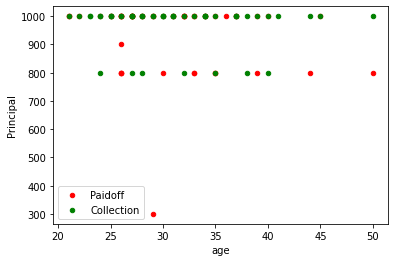

In [49]:
ax = loan_df[loan_df['loan_status'] == 'PAIDOFF'][0:50].plot(kind='scatter', x='age', y='Principal', color='red', label='Paidoff');
loan_df[loan_df['loan_status'] == 'COLLECTION'][0:50].plot(kind='scatter', x='age', y='Principal', color='green', label='Collection', ax=ax);
plt.show()

In [50]:
loan_df.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [51]:
import pandas as pd 
file_handler = open("loan_train.csv", 'r')
mydata = pd.read_csv(file_handler, sep = ",") 
file_handler.close() 
gender = {'male': 1,'female': 2} 
mydata.Gender = [gender[item] for item in mydata.Gender] 
loanstatus = {'PAIDOFF': 1,'COLLECTION': 2} 
mydata.loan_status = [loanstatus[item] for item in mydata.loan_status] 
education1 = {'High School or Below': 1, 'college': 2, 'Bechalor': 3, 'Master or Above': 4}
mydata.education = [education1[item] for item in mydata.education]
print(mydata)


     Unnamed: 0.1  Unnamed: 0  loan_status  Principal  terms effective_date  \
0               0           0            1       1000     30       9/8/2016   
1               2           2            1       1000     30       9/8/2016   
2               3           3            1       1000     15       9/8/2016   
3               4           4            1       1000     30       9/9/2016   
4               6           6            1       1000     30       9/9/2016   
..            ...         ...          ...        ...    ...            ...   
341           394         394            2        800     15      9/11/2016   
342           395         395            2       1000     30      9/11/2016   
343           397         397            2        800     15      9/12/2016   
344           398         398            2       1000     30      9/12/2016   
345           399         399            2       1000     30      9/12/2016   

       due_date  age  education  Gender  
0     10/

Dropping effective_date & due_data columns

In [52]:
mydata.drop(mydata.columns[[5,6]],axis=1,inplace=True)

In [53]:
mydata.dtypes

Unnamed: 0.1    int64
Unnamed: 0      int64
loan_status     int64
Principal       int64
terms           int64
age             int64
education       int64
Gender          int64
dtype: object

In [54]:
feature_df = mydata[['loan_status', 'Principal', 'terms', 'age', 'education', 'Gender']]
X = np.asarray(feature_df)
X[0:5]

array([[   1, 1000,   30,   45,    1,    1],
       [   1, 1000,   30,   33,    3,    2],
       [   1, 1000,   15,   27,    2,    1],
       [   1, 1000,   30,   28,    2,    2],
       [   1, 1000,   30,   29,    2,    1]], dtype=int64)

In [55]:
mydata['loan_status'] = mydata['loan_status'].astype('int')
y = np.asarray(mydata['loan_status'])
y [0:5]

array([1, 1, 1, 1, 1])

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (311, 6) (311,)
Test set: (35, 6) (35,)


In [57]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [58]:
yhat=clf.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

#### Accuracy

In [59]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted' ,labels=np.unique(yhat)) 

0.923076923076923

In [60]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.8571428571428571

In [61]:
from sklearn.metrics import classification_report

In [62]:


print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.86      1.00      0.92        30
           2       0.00      0.00      0.00         5

    accuracy                           0.86        35
   macro avg       0.43      0.50      0.46        35
weighted avg       0.73      0.86      0.79        35



C:\Users\ARUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [63]:
print('ACCURACY :\n')
metrics.accuracy_score(yhat,y_test)

ACCURACY :



0.8571428571428571

# Logistic Regression

In [64]:
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [65]:
loan_df = pd.read_csv("loan_train.csv")
loan_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [66]:
import pandas as pd 
gender = {'male': 1,'female': 2} 
loan_df.Gender = [gender[item] for item in loan_df.Gender] 
loanstatus = {'PAIDOFF': 1,'COLLECTION': 2} 
loan_df.loan_status = [loanstatus[item] for item in loan_df.loan_status] 
education1 = {'High School or Below': 1, 'college': 2, 'Bechalor': 3, 'Master or Above': 4}
loan_df.education = [education1[item] for item in loan_df.education]
loan_df.drop(loan_df.columns[[5,6]], axis=1, inplace=True)
print(loan_df) 

     Unnamed: 0.1  Unnamed: 0  loan_status  Principal  terms  age  education  \
0               0           0            1       1000     30   45          1   
1               2           2            1       1000     30   33          3   
2               3           3            1       1000     15   27          2   
3               4           4            1       1000     30   28          2   
4               6           6            1       1000     30   29          2   
..            ...         ...          ...        ...    ...  ...        ...   
341           394         394            2        800     15   32          1   
342           395         395            2       1000     30   25          1   
343           397         397            2        800     15   39          2   
344           398         398            2       1000     30   28          2   
345           399         399            2       1000     30   26          2   

     Gender  
0         1  
1         2

In [67]:
loan_df.dtypes

Unnamed: 0.1    int64
Unnamed: 0      int64
loan_status     int64
Principal       int64
terms           int64
age             int64
education       int64
Gender          int64
dtype: object

In [68]:
X= np.asarray(loan_df[['Principal','terms','age','education','Gender']])
X[0:5]

array([[1000,   30,   45,    1,    1],
       [1000,   30,   33,    3,    2],
       [1000,   15,   27,    2,    1],
       [1000,   30,   28,    2,    2],
       [1000,   30,   29,    2,    1]], dtype=int64)

In [69]:
y = np.asarray(loan_df['loan_status'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [70]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.99512471, -0.42056004],
       [ 0.51578458,  0.92071769,  0.34170148,  1.83872837,  2.37778177],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42180183, -0.42056004],
       [ 0.51578458,  0.92071769, -0.48739188,  0.42180183,  2.37778177],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42180183, -0.42056004]])

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [73]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [74]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.56447038, 0.43552962],
       [0.61824842, 0.38175158],
       [0.59962046, 0.40037954],
       [0.5525143 , 0.4474857 ],
       [0.57768618, 0.42231382],
       [0.58974347, 0.41025653],
       [0.57951762, 0.42048238],
       [0.58946942, 0.41053058],
       [0.5525143 , 0.4474857 ],
       [0.57546158, 0.42453842],
       [0.55757454, 0.44242546],
       [0.56765824, 0.43234176],
       [0.67967752, 0.32032248],
       [0.55690017, 0.44309983],
       [0.63351131, 0.36648869],
       [0.66348849, 0.33651151],
       [0.54422592, 0.45577408],
       [0.60027649, 0.39972351],
       [0.56262286, 0.43737714],
       [0.58201197, 0.41798803],
       [0.62987157, 0.37012843],
       [0.57017076, 0.42982924],
       [0.5543707 , 0.4456293 ],
       [0.60503407, 0.39496593],
       [0.6689971 , 0.3310029 ],
       [0.55942669, 0.44057331],
       [0.55690017, 0.44309983],
       [0.70301289, 0.29698711],
       [0.56010026, 0.43989974],
       [0.66972885, 0.33027115],
       [0.

In [75]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat)

0.7857142857142857

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[55  0]
 [ 0  0]]


Confusion matrix, without normalization
[[55  0]
 [ 0  0]]


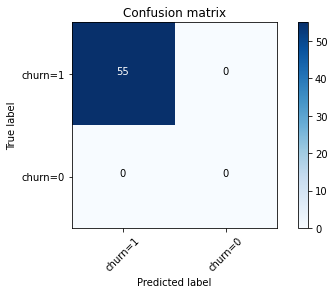

In [77]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [78]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        55
           2       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70



C:\Users\ARUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [79]:
print('ACCURACY :\n')
metrics.accuracy_score(yhat,y_test)

ACCURACY :



0.7857142857142857

### Log Loss
 log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.


In [80]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6009771839994061

# Report

| Algorithm | Jaccard | F1-score | LogLoss |
| --- | --- | --- | --- |
| KNN | 0.718 | 0.74 | NA |
| Decesion tree | 0.742 | 0.74 | NA |
| SVM | 0.85 | 0.79 | NA |
| Logistic Regression | 0.78 | 0.69 | 0.6009 |